# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

import matplotlib.pyplot as plt

C:\Users\eg1\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\eg1\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\eg1\AppData\Local\Temp\ipykernel_1856\1088348577.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as

The scikit-learn version is 1.4.0.


# Import Data

In [2]:
df = pd.read_csv("C:\\Users\\eg1\\Videos\\21bce1125\\data.csv")
print(df)
df.dtypes
df.info()

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   O

In [4]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,Play Tennis,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


# Split into train and test dataset

In [5]:
X = df_getdummy.drop('Play Tennis',axis=1)
y = df_getdummy['Play Tennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Construct the decision trees

In [6]:

dtree1 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree1.fit(X_train,y_train)
predictions = dtree1.predict(X_test)

# CART
dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=2)
dtree2.fit(X_train,y_train)
predictions = dtree2.predict(X_test)

# C4.5
dtree3 = DecisionTreeClassifier(criterion='log_loss',max_depth=2)
dtree3.fit(X_train,y_train)
predictions = dtree3.predict(X_test)

# Display the Trees

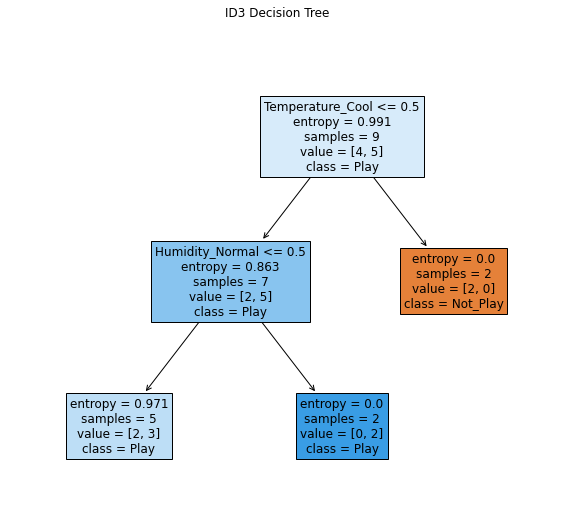

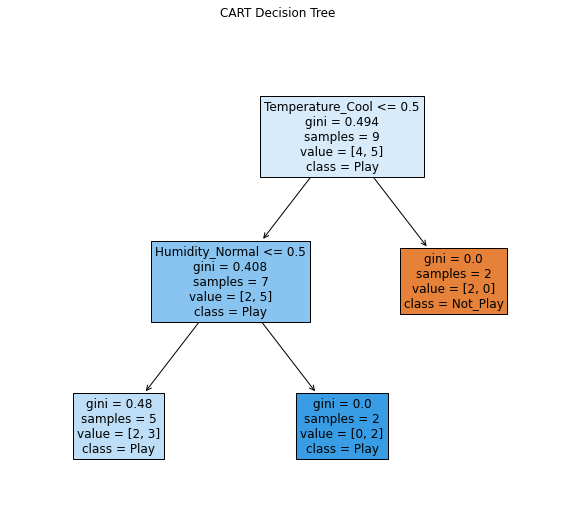

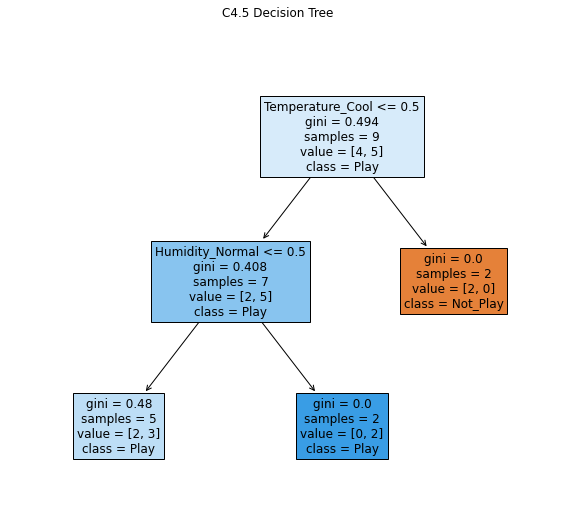

In [7]:
fig1 = plt.figure(figsize=(10,8))
plt.suptitle("ID3 Decision Tree")
a = plot_tree(dtree1, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

fig2 = plt.figure(figsize=(10,8), )
plt.suptitle("CART Decision Tree")
b = plot_tree(dtree2, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

fig3 = plt.figure(figsize=(10,8), )
plt.suptitle("C4.5 Decision Tree")
b = plot_tree(dtree2, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])



# Construct CART Tree